### Model Training

In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model  import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing x and y variables

In [47]:
x = df[["gender","race/ethnicity","parental level of education","lunch","test preparation course","reading score","writing score"]]

In [48]:
y = df["math score"]

In [49]:
# Column transformer 
num_features =  x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from  sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor =  ColumnTransformer([
    ("OneHotEncoder",OneHotEncoder(),cat_features),
    ("StandardScaler",StandardScaler(),num_features)
])

In [50]:
x= preprocessor.fit_transform(x)
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [51]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape

((800, 19), (800,))

In [52]:
# Evaluate function to give all metrics after model training
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse =  mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2__score = r2_score(true,predicted)

    return mae,mse,rmse,r2__score

In [53]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGB Regressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model =  list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred =model.predict(x_train)
    y_test_pred = model.predict(x_test)
   
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2_score = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2_score = evaluate_model(y_test,y_test_pred)

    print("\n************************************")
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("************************************")
    print("Model Performance for Training set")
    print("MAE ",model_train_mae)
    print("MSE ",model_train_mse)
    print("RMSE ",model_train_rmse)
    print("R2 Score ",model_train_r2_score)
    
    print("---------------------------------------")
    
    print("Model Performance for Test set")
    print("MAE ",model_test_mae)
    print("MSE ",model_test_mse)
    print("RMSE ",model_test_rmse)
    print("R2 Score ",model_test_r2_score)
    r2_list.append(model_test_r2_score)
    


************************************
Linear Regression
************************************
Model Performance for Training set
MAE  4.271142578125
MSE  28.369431838989257
RMSE  5.326296259033031
R2 Score  0.8741639024226954
---------------------------------------
Model Performance for Test set
MAE  4.2262109375
MSE  29.21705291748047
RMSE  5.405280096117172
R2 Score  0.8799324195544951

************************************
Lasso
************************************
Model Performance for Training set
MAE  5.206302661246526
MSE  43.47840400585579
RMSE  6.593815587795566
R2 Score  0.8071462015863456
---------------------------------------
Model Performance for Test set
MAE  5.157881810347763
MSE  42.50641683841163
RMSE  6.519694535667421
R2 Score  0.8253197323627852

************************************
Ridge
************************************
Model Performance for Training set
MAE  4.264987823725981
MSE  28.33778823308244
RMSE  5.323324922741654
R2 Score  0.8743042615212909
----------


************************************
Random Forest Regressor
************************************
Model Performance for Training set
MAE  1.8244114583333333
MSE  5.292916034137614
RMSE  2.300633833128952
R2 Score  0.9765226211677297
---------------------------------------
Model Performance for Test set
MAE  4.5558000000000005
MSE  35.29311202777778
RMSE  5.940800621783042
R2 Score  0.8549628335364341

************************************
XGB Regressor
************************************
Model Performance for Training set
MAE  0.6874666035175323
MSE  1.0146163961652577
RMSE  1.0072816866027385
R2 Score  0.9954995444196413
---------------------------------------
Model Performance for Test set
MAE  5.057730598449707
MSE  41.90370826987466
RMSE  6.4733073671713335
R2 Score  0.8277965653186071
Learning rate set to 0.039525
0:	learn: 14.5987177	total: 7.38ms	remaining: 7.37s
1:	learn: 14.2251886	total: 10.3ms	remaining: 5.12s
2:	learn: 13.8866124	total: 13ms	remaining: 4.33s
3:	learn: 13.5

In [55]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["model","r2 score"]).sort_values(by=["r2 score"],ascending=True)

,model,r2 score
4,Decision Tree Regressor,0.728526
3,K-Neighbors Regressor,0.783497
1,Lasso,0.825320
6,XGB Regressor,0.827797
8,AdaBoost Regressor,0.848921
7,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.854963
0,Linear Regression,0.879932
2,Ridge,0.880593


In [68]:
# linear  Regression
linear_model = Ridge(fit_intercept=True)
linear_model = linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)
score = r2_score(y_test,y_pred)

In [69]:
score

0.880593148502874

Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

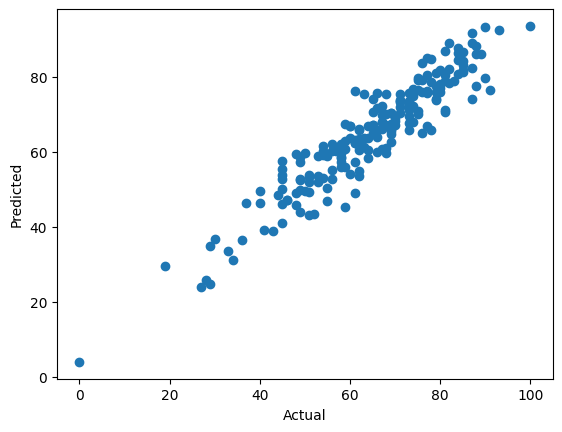

In [70]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

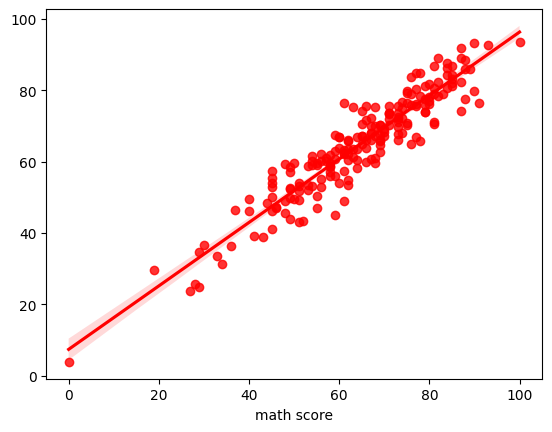

In [71]:
sns.regplot(x=y_test,y=y_pred,color="red")

In [72]:
# Difference between Actual and Predicted values
pred_df=pd.DataFrame({"Actual value":y_test,"Predicted value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
